# Dynamic Feature As Single Features

## Initialisation

In [39]:
import os

import numpy as np
import pandas as pd

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path)
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\ode-biomarker-project


In [40]:
# Bring in CCLE data
from PathLoader import PathLoader
from DataLink import DataLink
path_loader = PathLoader('data_config.env', 'current_user.env')
data_link = DataLink(path_loader, 'data_codes.csv')

In [41]:
drug_code = 'gdsc-1-FGFR_0939'
dynamic_features_code = 'fgfr4_ccle_dynamic_features_v2'
raw_simulation_code = 'fgfr4_model_raw_simulation'
time_size = 1440

In [42]:
# load in original ccle data
loading_code = f'generic-{drug_code}-LN_IC50-{dynamic_features_code}-true-Unnamed: 0'
# generic-gdsc-{number}-{drug_name}-{target_label}-{dataset_name}-{replace_index}-{row_index}
feature_data, label_data = data_link.get_data_using_code(loading_code)

In [43]:
loading_code = dynamic_features_code
dynamic_features = data_link.get_data_from_code(loading_code)

In [44]:
# attempt load from loading code

# cdk_model_raw_simulation
# fgfr4_model_raw_simulation

loading_code = raw_simulation_code
simulation_data = data_link.get_data_from_code(loading_code)

## Dynamic Feature vs Simulation Data Validation

In [53]:
dynamic_features

,Unnamed: 0,pIGFR_auc,pIGFR_median,pIGFR_tfc,pIGFR_tmax,pIGFR_max,pIGFR_tmin,pIGFR_min,pIGFR_ttsv,pIGFR_tsv,...,amTORC2_auc,amTORC2_median,amTORC2_tfc,amTORC2_tmax,amTORC2_max,amTORC2_tmin,amTORC2_min,amTORC2_ttsv,amTORC2_tsv,amTORC2_init
0,ACH-001113,0.019879,0.022585,5.339313,0.96,0.029060,0.0,0.004584,0.04,0.004584,...,0.038656,0.039956,0.334899,0.96,0.047065,0.04,0.035257,0.04,0.035257,0.035257
1,ACH-001289,0.047131,0.051773,9.378872,0.96,0.083667,0.0,0.008061,0.04,0.008061,...,0.000253,0.000261,0.144059,0.96,0.000289,0.00,0.000252,0.04,0.000252,0.000252
2,ACH-001339,0.107427,0.124875,11.832264,0.96,0.183883,0.0,0.014330,0.40,0.099500,...,0.756770,0.788399,0.280706,0.96,0.885227,0.00,0.691203,0.04,0.691203,0.691203
3,ACH-001538,0.018977,0.020471,6.192774,0.96,0.033563,0.0,0.004666,0.04,0.004666,...,0.028552,0.029323,0.815663,0.96,0.039862,0.00,0.021955,0.04,0.021955,0.021955
4,ACH-000242,0.019410,0.021032,4.682872,0.96,0.032885,0.0,0.005787,0.04,0.005787,...,0.001717,0.001599,5.486629,0.96,0.003834,0.00,0.000591,0.04,0.000591,0.000591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,ACH-000285,0.051886,0.059549,14.115679,0.96,0.092129,0.0,0.006095,0.04,0.006095,...,1.255967,1.308348,0.277441,0.96,1.468070,0.00,1.149228,1.00,1.468070,1.149228
1400,ACH-002669,0.019672,0.022874,8.579873,0.96,0.030418,0.0,0.003175,0.04,0.003175,...,0.002564,0.002408,3.713168,0.96,0.005368,0.00,0.001139,0.04,0.001139,0.001139
1401,ACH-001858,0.029551,0.033124,10.070813,0.96,0.051003,0.0,0.004607,0.04,0.004607,...,0.037795,0.039048,0.545008,0.96,0.049100,0.00,0.031780,0.04,0.031780,0.031780
1402,ACH-001997,0.056725,0.062795,12.479992,0.96,0.106207,0.0,0.007879,0.04,0.007879,...,0.256407,0.267035,0.297960,0.96,0.301974,0.00,0.232653,0.04,0.232653,0.232653


In [54]:
simulation_data

,Cellline,Time,pIGFR,pFGFR4,pERBB,pIRS,aPI3K,PIP3,pFRS2,aGrb2,...,pMEK,pERK,aGAB1,aGAB2,SPRY2,pSPRY2,PTP,aCbl,FOXO,amTORC2
0,ACH-001113,0,0.004584,133.063698,30.041304,0.008239,0.711660,0.026866,0.072482,1.762771,...,0.039595,434.690222,3.511815,5.665967e-11,1.286341,1.633151e-05,12.094080,4.013742,142.223071,0.035257
1,ACH-001113,60,0.006161,0.707059,39.850969,0.008820,0.032865,0.001236,0.000389,0.971944,...,0.001151,15.624283,0.113390,9.005249e-10,8.647812,5.886911e-07,8.997799,4.020537,171.210063,0.035257
2,ACH-001113,120,0.009543,0.978536,59.249121,0.009739,0.489603,0.018473,0.000537,1.444383,...,0.004874,64.992899,2.119397,3.140406e-10,15.677962,1.475912e-06,5.807274,4.030926,184.264175,0.035376
3,ACH-001113,180,0.011310,1.096258,68.814101,0.010853,0.672549,0.025385,0.000602,1.677192,...,0.004177,55.951646,3.238889,4.195981e-10,22.294951,2.351654e-06,4.898984,4.044253,178.354613,0.035659
4,ACH-001113,240,0.012745,1.181330,76.305021,0.012089,0.784335,0.029606,0.000649,1.859451,...,0.003584,48.188283,4.055861,5.370477e-10,28.509268,3.240881e-06,4.346681,4.059094,167.608802,0.036007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35095,ACH-000052,1200,0.049248,1.880391,138.650385,0.105497,16.697973,0.630293,0.000829,3.100799,...,0.000528,7.727831,27.141942,1.291626e-08,84.758057,1.231497e-05,0.770462,5.088860,9.824946,0.523766
35096,ACH-000052,1260,0.050298,1.876532,140.159651,0.110402,16.704313,0.630532,0.000828,3.134400,...,0.000517,7.566772,27.187355,1.332593e-08,86.538262,1.254786e-05,0.754276,5.125351,9.810677,0.528856
35097,ACH-000052,1320,0.051284,1.872069,141.548801,0.115091,16.710030,0.630748,0.000826,3.165321,...,0.000507,7.420166,27.228411,1.371511e-08,88.215995,1.276073e-05,0.739682,5.161324,9.796681,0.533944
35098,ACH-000052,1380,0.052211,1.867138,142.832245,0.119569,16.715218,0.630944,0.000824,3.193884,...,0.000497,7.286105,27.265736,1.408519e-08,89.799967,1.295566e-05,0.726451,5.196746,9.782923,0.539031


### One Specie One Cellline

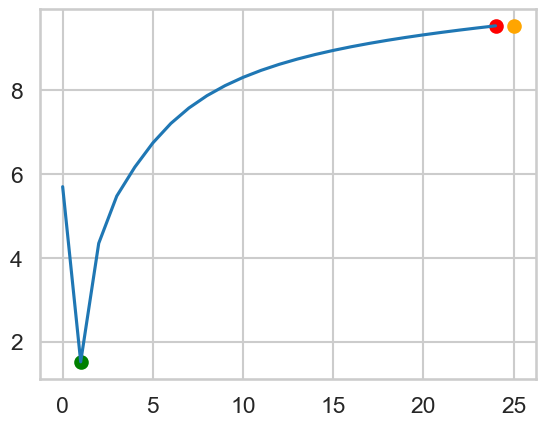

In [55]:
cellline = 'ACH-001113'
specie = 'pAkt'
selected_data = simulation_data[simulation_data['Cellline'] == cellline]
specie_data = selected_data[specie]
dyn_feat_cols = ['auc', 'median', 'tfc', 'tmax',
                 'max', 'tmin', 'min', 'ttsv', 'tsv', 'init']
dynamic_features_indexed = dynamic_features.set_index('Unnamed: 0')
x = dynamic_features_indexed.loc[cellline]
# get only dynamic features that start with 'pAkt'
specie_features = dynamic_features_indexed.filter(regex=f'^{specie}'+'_', axis=1)
cellline_specie_features = specie_features.loc[cellline]
max_ = cellline_specie_features[f'{specie}_max']
max_time = cellline_specie_features[f'{specie}_tmax']
min_ = cellline_specie_features[f'{specie}_min']
min_time = cellline_specie_features[f'{specie}_tmin']
tsv = cellline_specie_features[f'{specie}_tsv']
ttsv = cellline_specie_features[f'{specie}_ttsv']
import matplotlib.pyplot as plt

plt.plot(specie_data)
plt.scatter([max_time*len(specie_data)], [max_], color='red')  # max
plt.scatter([min_time*len(specie_data)], [min_], color='green')  # min
plt.scatter([ttsv*len(specie_data)], [tsv], color='orange')  # stability
plt.show()

### All species All Celllines

In [56]:
target_proteins = [specie]

indexed_dyn_feats = dynamic_features.set_index('Unnamed: 0')
columns = indexed_dyn_feats.columns

dyn_feat_cols = ['auc', 'median', 'tfc', 'tmax',
                 'max', 'tmin', 'min', 'ttsv', 'tsv', 'init']

joint_dyn_feat_data = []
joint_labels = []
joint_labels_id = []


# dataFrame['column name'].str.match('string')


dyn_feat_data = []
for protein in target_proteins:
    # filter data based on "protein_" in the column name
    filtered_cols = [col for col in columns if col.startswith(protein+"_")]
    filtered_data = indexed_dyn_feats[filtered_cols]
    dyn_feat_data.append(filtered_data)

    # specie_features = dynamic_features_indexed.filter(regex=f'^{specie}'+'_', axis=1)
for i, data in enumerate(dyn_feat_data):
    label = target_proteins[i]
    label_id = i
    for row in range(data.shape[0]):
        data_row = data.iloc[row].tolist()
        # print(label,len(data_row))
        joint_dyn_feat_data.append(data_row)
        joint_labels.append(label)
        joint_labels_id.append(label_id)

joint_dyn_feat_df = pd.DataFrame(joint_dyn_feat_data, columns=dyn_feat_cols)

<ErrorbarContainer object of 3 artists>

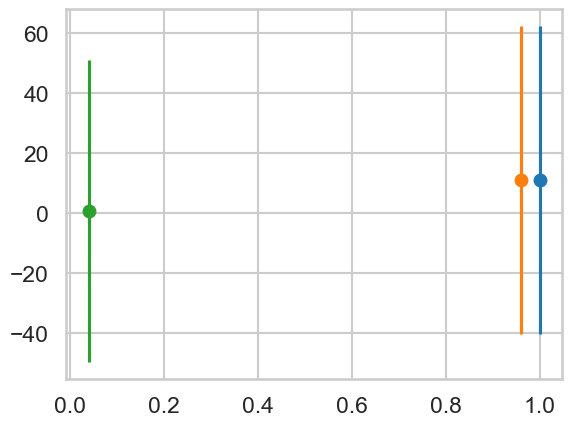

In [57]:
tmax_median = joint_dyn_feat_df['tmax'].median()
tmin_median = joint_dyn_feat_df['tmin'].median()
ttsv_median = joint_dyn_feat_df['ttsv'].median()
tsv_median = joint_dyn_feat_df['tsv'].median()
max_median = joint_dyn_feat_df['max'].median()
min_median = joint_dyn_feat_df['min'].median()

tmax_mean = joint_dyn_feat_df['tmax'].mean()
tmin_mean = joint_dyn_feat_df['tmin'].mean()
ttsv_mean = joint_dyn_feat_df['ttsv'].mean()
tsv_mean = joint_dyn_feat_df['tsv'].mean()
max_mean = joint_dyn_feat_df['max'].mean()
min_mean = joint_dyn_feat_df['min'].mean()

tmax_std = joint_dyn_feat_df['tmax'].std()
tmin_std = joint_dyn_feat_df['tmin'].std()
ttsv_std = joint_dyn_feat_df['ttsv'].std()
tsv_std = joint_dyn_feat_df['tsv'].std()
max_std = joint_dyn_feat_df['max'].std()
min_std = joint_dyn_feat_df['min'].std()

# plot dot with error bars
fig, ax = plt.subplots()
ax.errorbar([ttsv_median], [tsv_median], yerr=[tsv_std], fmt='o', label='tsv')
ax.errorbar([tmax_median], [max_median], yerr=[max_std], fmt='o', label='max')
ax.errorbar([tmin_median], [min_median], yerr=[min_std], fmt='o', label='min')

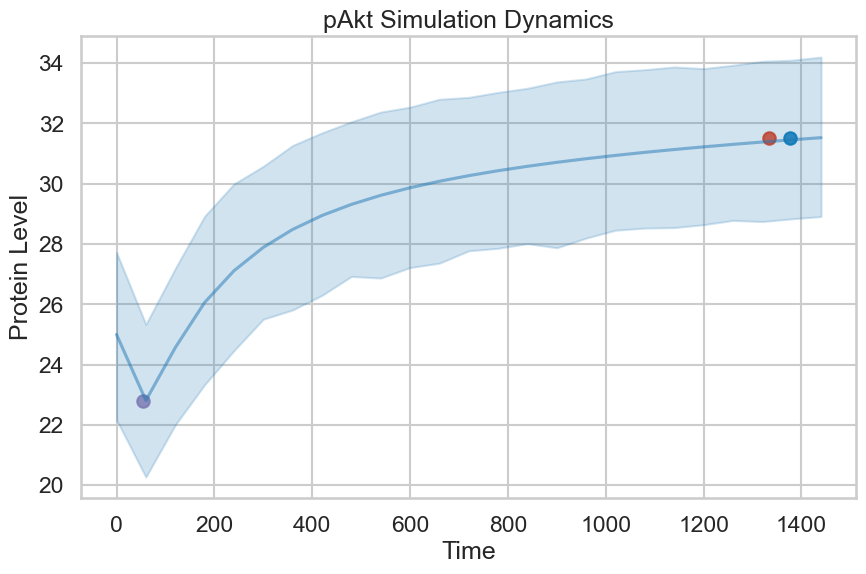

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10, 6))
sns.lineplot(data=simulation_data, x='Time', y=specie, alpha=0.5)
# plt.errorbar([ttsv_median*1440], [tsv_median], yerr=[tsv_std], fmt='o', label='tsv', color='#BC3C29FF', alpha=0.8)
# plt.errorbar([tmax_median*1440], [max_median], yerr=[max_std], fmt='o', label='max', color='#0072B5FF', alpha=0.8)
# plt.errorbar([tmin_median*1440], [min_median], yerr=[min_std], fmt='o', label='min', color='#7876B1FF', alpha=0.8)
plt.scatter([ttsv_mean*time_size], [tsv_mean], color='#BC3C29FF', alpha=0.8)
plt.scatter([tmax_mean*time_size], [max_mean], color='#0072B5FF', alpha=0.8)
plt.scatter([tmin_mean*time_size], [min_mean], color='#7876B1FF', alpha=0.8)
# use legend, place it outside
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.xlabel('Time')
plt.ylabel('Protein Level')
plt.title(f'{specie} Simulation Dynamics')
plt.show()

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style('whitegrid')
sns.set_context('talk')
all_species = simulation_data.columns[2:]

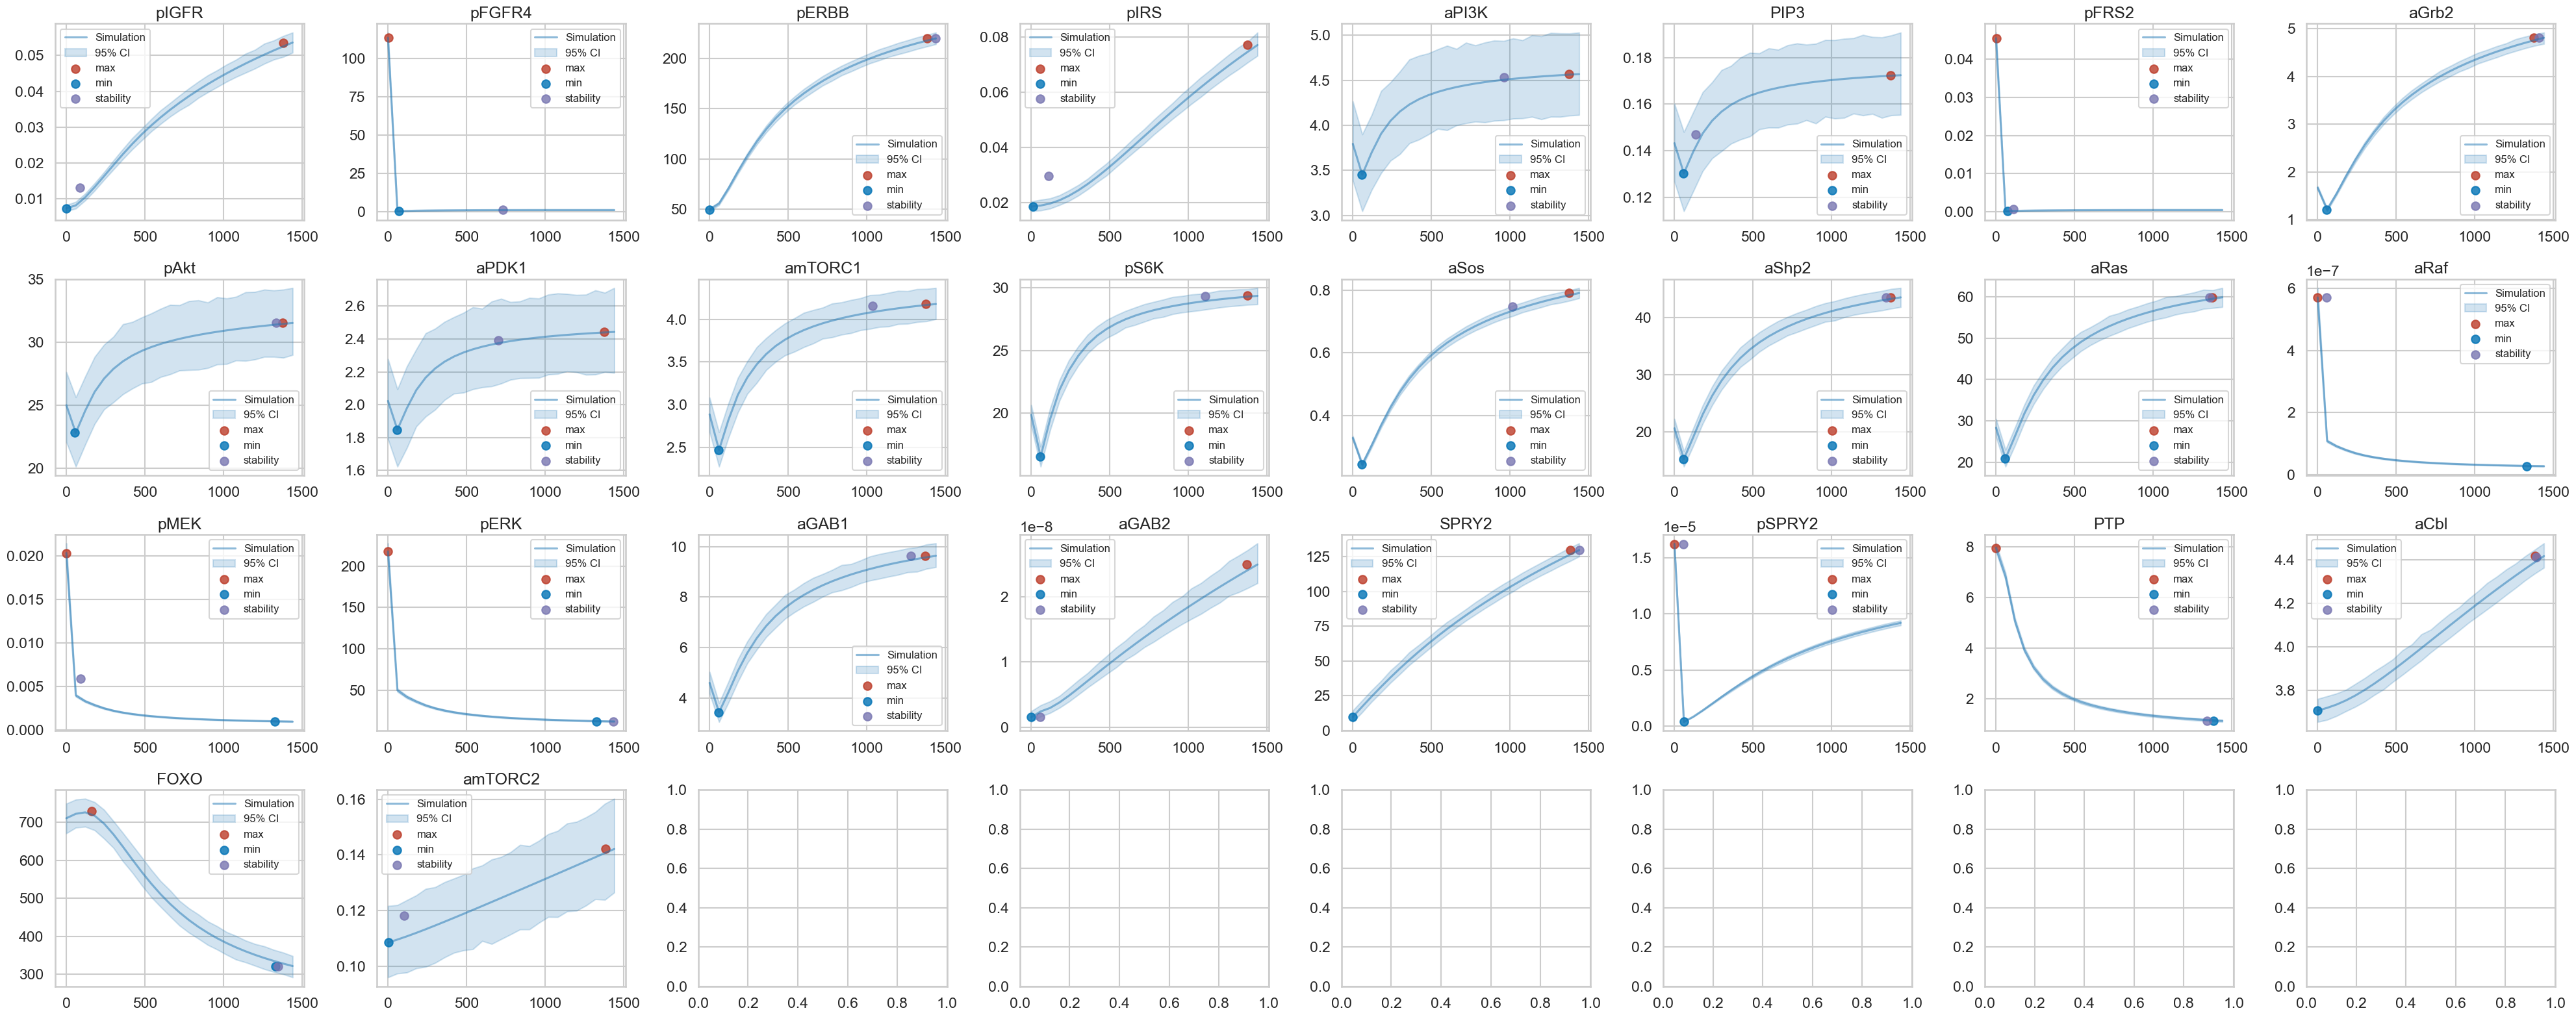

In [52]:
import math

plot_cols = 8
plot_rows = math.ceil(len(all_species)/plot_cols)
plt.subplots(plot_rows, plot_cols, figsize=(5*plot_cols, 4*plot_rows))

max_color = '#BC3C29FF'
min_color = '#0072B5FF'
tsv_color = '#7876B1FF'

for i, p in enumerate(all_species):
    if p == 'Time':
        continue
    plt.subplot(plot_rows, plot_cols, i+1)
    df = dynamic_features_indexed.filter(regex=f'^{p}'+'_', axis=1)
    ttsv_mean = df[f'{p}_ttsv'].mean()
    tmax_mean = df[f'{p}_tmax'].mean()
    tmin_mean = df[f'{p}_tmin'].mean()
    max_mean = df[f'{p}_max'].mean()
    min_mean = df[f'{p}_min'].mean()
    tsv_mean = df[f'{p}_tsv'].mean()
    sns.lineplot(data=simulation_data, x='Time', y=p, alpha=0.5)
    plt.scatter([tmax_mean*time_size], [max_mean], color=max_color, alpha=0.8)
    plt.scatter([tmin_mean*time_size], [min_mean], color=min_color, alpha=0.8)
    plt.scatter([ttsv_mean*time_size], [tsv_mean], color=tsv_color, alpha=0.8)
    # no x and y labels
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(['Simulation', '95% CI', 'max', 'min', 'stability'], loc='best', fontsize=12)
    plt.title(p)

# plt.legend(['Simulation', '95% CI', 'max', 'min', 'stability'], loc='best', fontsize=12, bbox_to_anchor=(1, 1))
# plt.suptitle('Simulation and Dynamic Features of the FGFR4 Model', fontsize=30)
# leave a bit of space between title and plots
plt.tight_layout()
plt.show()

## Visualisation 

In [ ]:
dynamic_features['pAkt_max']

KeyError: 'pAkt_max'

In [ ]:
dynamic_features

,pIGFR_auc,pIGFR_median,pIGFR_tfc,pIGFR_tmax,pIGFR_max,pIGFR_tmin,pIGFR_min,pIGFR_ttsv,pIGFR_tsv,pIGFR_init,...,amTORC2_auc,amTORC2_median,amTORC2_tfc,amTORC2_tmax,amTORC2_max,amTORC2_tmin,amTORC2_min,amTORC2_ttsv,amTORC2_tsv,amTORC2_init
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ACH-001113,0.019879,0.022585,5.339313,0.96,0.029060,0.0,0.004584,0.04,0.004584,0.004584,...,0.038656,0.039956,0.334899,0.96,0.047065,0.04,0.035257,0.04,0.035257,0.035257
ACH-001289,0.047131,0.051773,9.378872,0.96,0.083667,0.0,0.008061,0.04,0.008061,0.008061,...,0.000253,0.000261,0.144059,0.96,0.000289,0.00,0.000252,0.04,0.000252,0.000252
ACH-001339,0.107427,0.124875,11.832264,0.96,0.183883,0.0,0.014330,0.40,0.099500,0.014330,...,0.756770,0.788399,0.280706,0.96,0.885227,0.00,0.691203,0.04,0.691203,0.691203
ACH-001538,0.018977,0.020471,6.192774,0.96,0.033563,0.0,0.004666,0.04,0.004666,0.004666,...,0.028552,0.029323,0.815663,0.96,0.039862,0.00,0.021955,0.04,0.021955,0.021955
ACH-000242,0.019410,0.021032,4.682872,0.96,0.032885,0.0,0.005787,0.04,0.005787,0.005787,...,0.001717,0.001599,5.486629,0.96,0.003834,0.00,0.000591,0.04,0.000591,0.000591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.051886,0.059549,14.115679,0.96,0.092129,0.0,0.006095,0.04,0.006095,0.006095,...,1.255967,1.308348,0.277441,0.96,1.468070,0.00,1.149228,1.00,1.468070,1.149228
ACH-002669,0.019672,0.022874,8.579873,0.96,0.030418,0.0,0.003175,0.04,0.003175,0.003175,...,0.002564,0.002408,3.713168,0.96,0.005368,0.00,0.001139,0.04,0.001139,0.001139
ACH-001858,0.029551,0.033124,10.070813,0.96,0.051003,0.0,0.004607,0.04,0.004607,0.004607,...,0.037795,0.039048,0.545008,0.96,0.049100,0.00,0.031780,0.04,0.031780,0.031780


### Generate Data

In [ ]:
target_proteins = ['pAkt']

indexed_dyn_feats = dynamic_features.set_index('Unnamed: 0')
columns = indexed_dyn_feats.columns

dyn_feat_cols = ['auc', 'median', 'tfc', 'tmax',
                 'max', 'tmin', 'min', 'ttsv', 'tsv', 'init']

joint_dyn_feat_data = []
joint_labels = []
joint_labels_id = []


# dataFrame['column name'].str.match('string')


dyn_feat_data = []
for protein in target_proteins:
    # filter data based on "protein_" in the column name
    filtered_cols = [col for col in columns if col.startswith(protein)]
    filtered_data = indexed_dyn_feats[filtered_cols]
    dyn_feat_data.append(filtered_data)

for i, data in enumerate(dyn_feat_data):
    label = target_proteins[i]
    label_id = i
    for row in range(data.shape[0]):
        data_row = data.iloc[row].tolist()
        # print(label,len(data_row))
        joint_dyn_feat_data.append(data_row)
        joint_labels.append(label)
        joint_labels_id.append(label_id)

joint_dyn_feat_df = pd.DataFrame(joint_dyn_feat_data, columns=dyn_feat_cols)


In [ ]:
joint_dyn_feat_df

,auc,median,tfc,tmax,max,tmin,min,ttsv,tsv,init
0,7.545674,8.610290,0.673860,0.96,9.529036,0.04,1.515733,1.00,9.529036,5.692853
1,0.073010,0.072578,4.453522,0.96,0.153445,0.04,0.016674,0.08,0.016674,0.028137
2,162.700942,169.686899,0.028081,0.96,171.280213,0.00,166.601936,1.00,171.280213,166.601936
3,13.341823,15.283082,2.054382,0.96,16.885705,0.04,4.377614,1.00,16.885705,5.528354
4,3.747116,4.649049,49.365464,0.96,5.897808,0.04,0.098960,1.00,5.897808,0.117100
...,...,...,...,...,...,...,...,...,...,...
1399,201.243945,210.147178,0.042212,0.96,213.425242,0.04,203.001024,1.00,213.425242,204.780941
1400,3.914865,5.042050,58.943764,0.96,6.127099,0.04,0.061449,1.00,6.127099,0.102214
1401,23.054133,26.434426,1.424329,0.96,28.143758,0.04,5.754933,1.00,28.143758,11.608884
1402,59.515955,62.350753,0.070210,0.96,63.223964,0.00,59.076225,1.00,63.223964,59.076225


### Visualise One Protein at One row

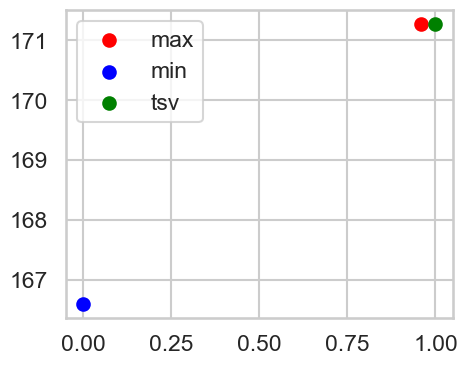

In [ ]:
# import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# set context and style
sns.set_style("whitegrid")
sns.set_context("talk")

# plot joint_dyn_feat_df, plot (tmax, max), (tmin, min) and (ttsv, tsv) as time points 
row = 2
plt.figure(figsize=(5, 4))
# scatter only row 
plt.scatter(joint_dyn_feat_df.iloc[row]['tmax'], joint_dyn_feat_df.iloc[row]['max'], color='red', label='max')
plt.scatter(joint_dyn_feat_df.iloc[row]['tmin'], joint_dyn_feat_df.iloc[row]['min'], color='blue', label='min')
plt.scatter(joint_dyn_feat_df.iloc[row]['ttsv'], joint_dyn_feat_df.iloc[row]['tsv'], color='green', label='tsv')
# create legend for coloured figures 
plt.legend()

### Visualise One Protein at All Rows 

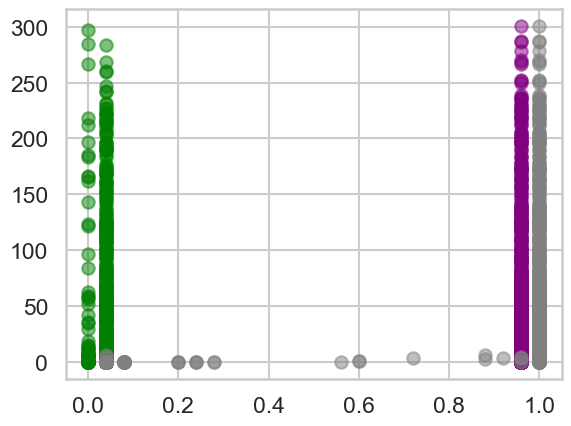

In [ ]:
plt.scatter(joint_dyn_feat_df['tmax'], joint_dyn_feat_df['max'],color='purple', label='max', alpha=0.5)
plt.scatter(joint_dyn_feat_df['tmin'], joint_dyn_feat_df['min'], color='green', label='min', alpha=0.5)
plt.scatter(joint_dyn_feat_df['ttsv'], joint_dyn_feat_df['tsv'], color='grey', label='tsv', alpha=0.5)
# plt.legend()

### Visualise all proteins at all rows

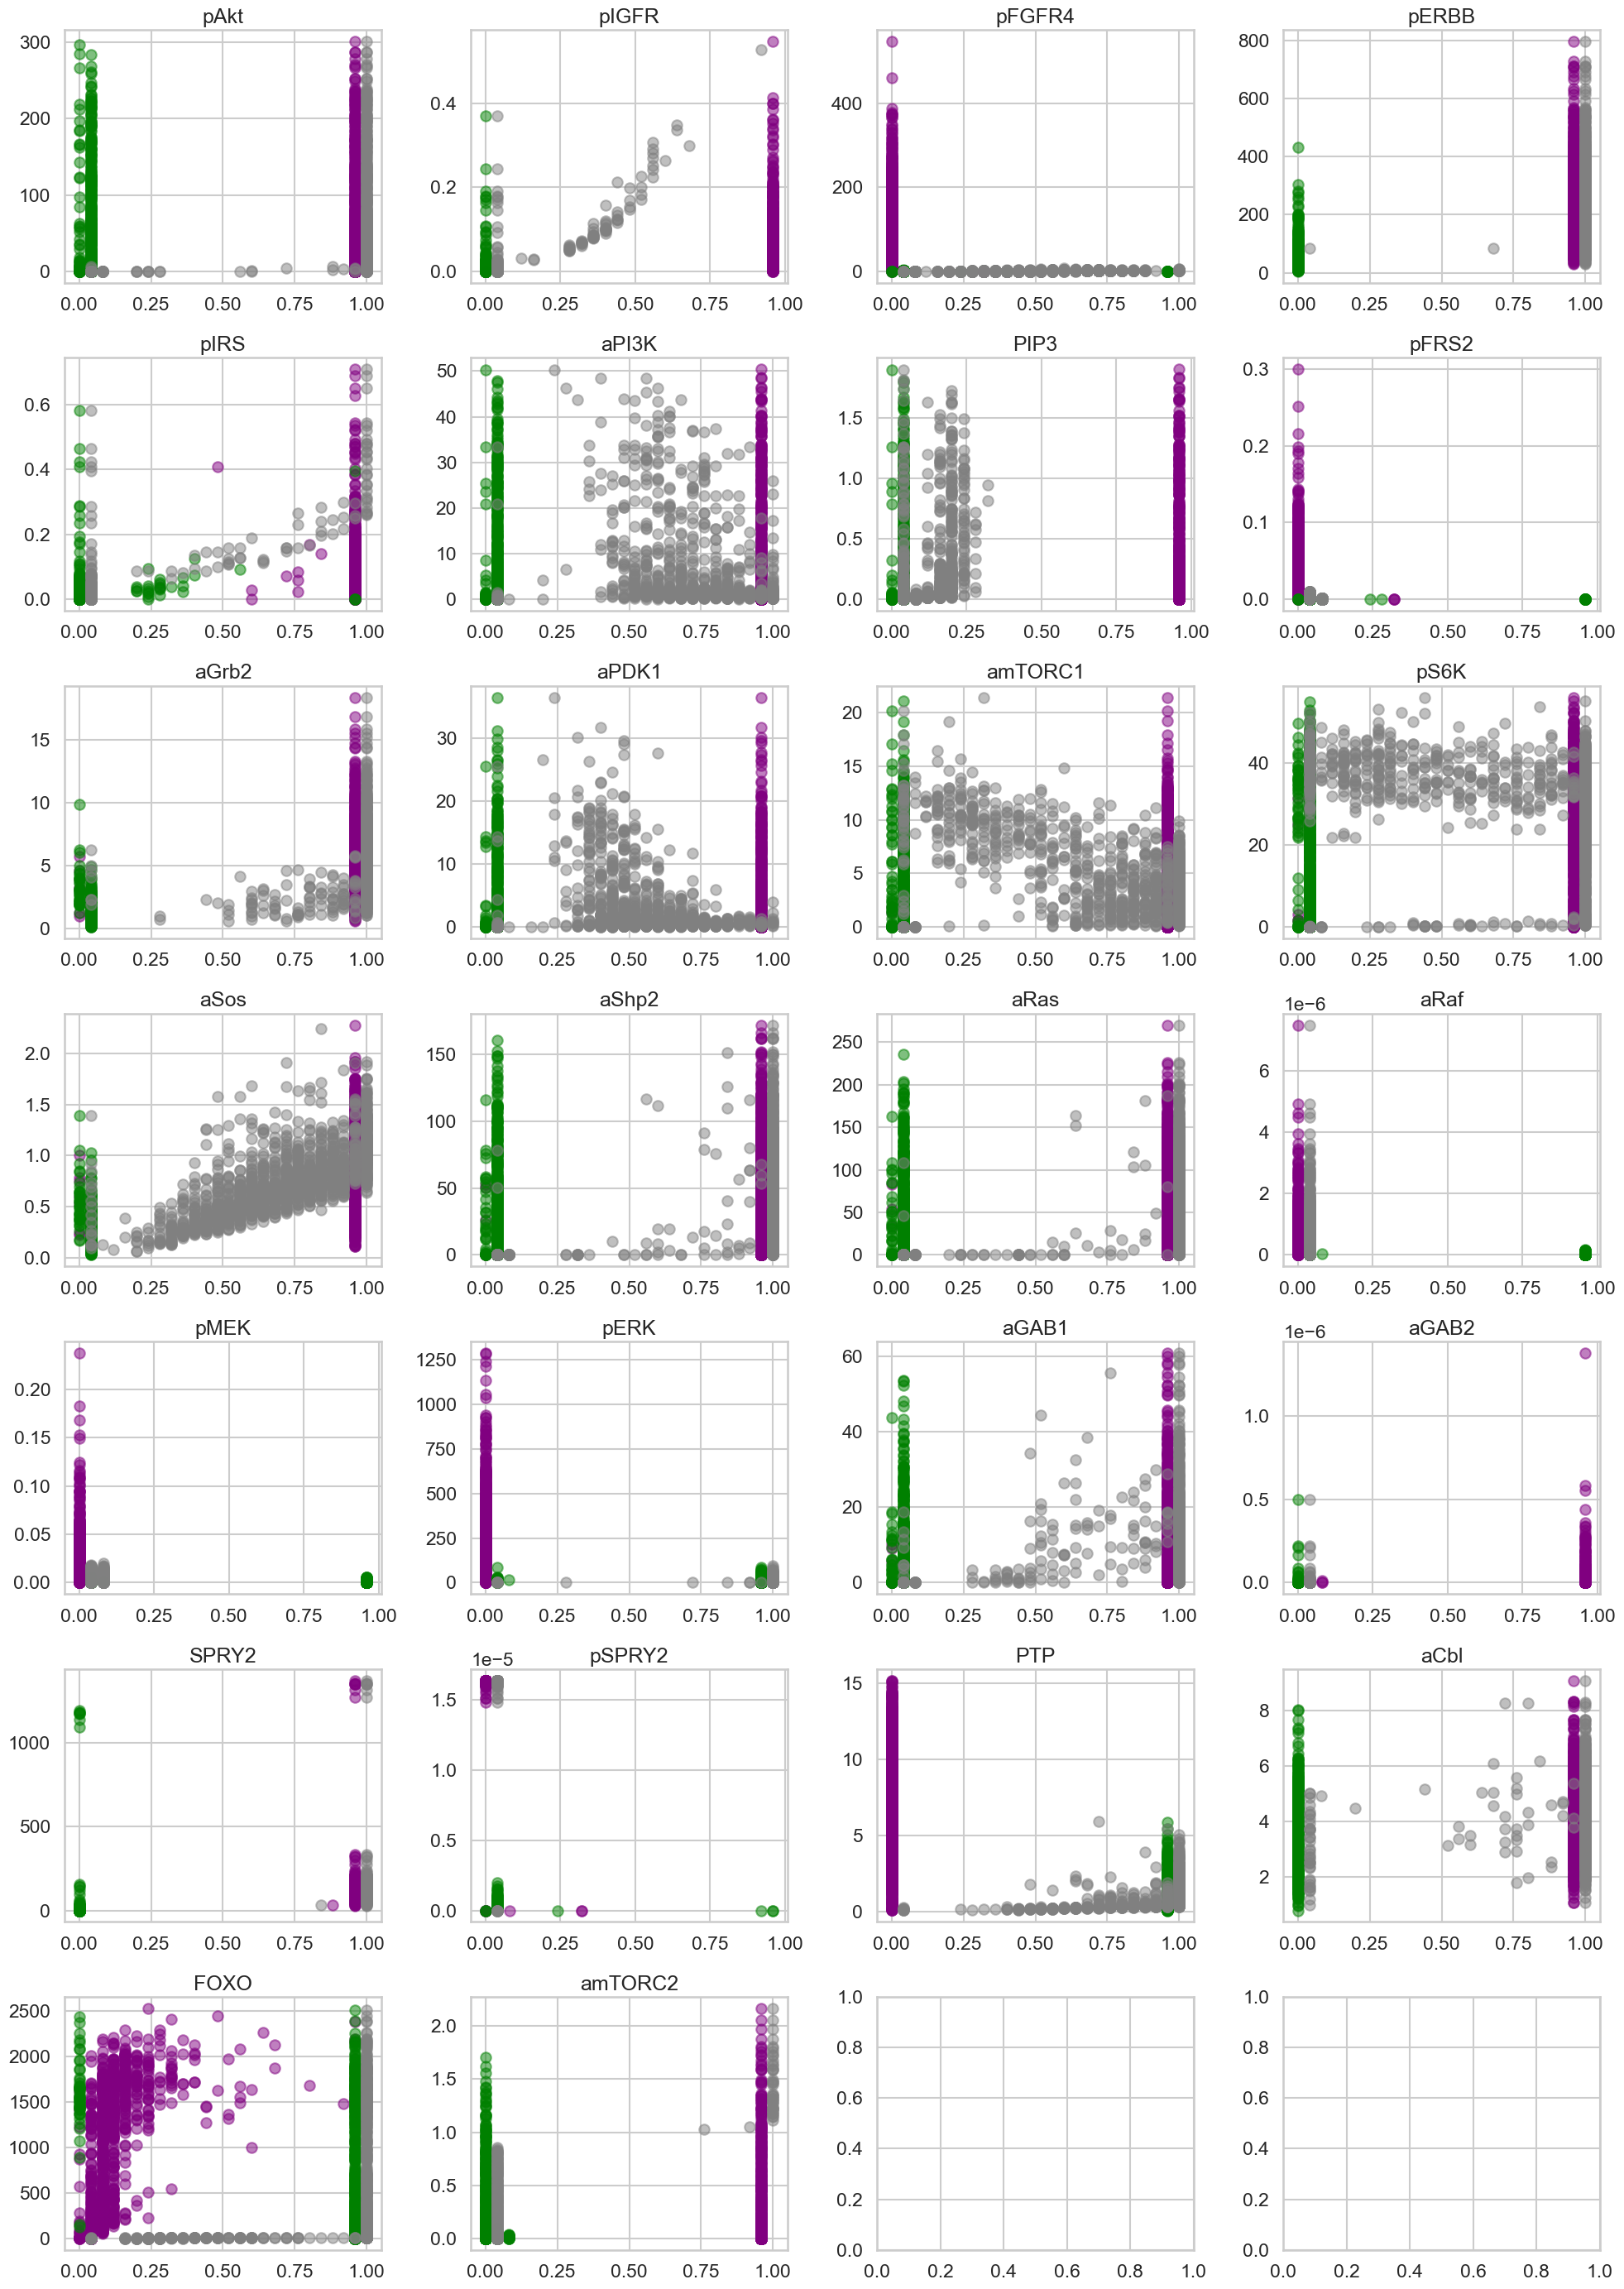

In [ ]:
all_proteins = [
    'pAkt', 'pIGFR', 'pFGFR4', 'pERBB', 'pIRS', 'aPI3K', 'PIP3', 'pFRS2',
    'aGrb2', 'aPDK1', 'amTORC1', 'pS6K', 'aSos', 'aShp2', 'aRas', 'aRaf',
    'pMEK', 'pERK', 'aGAB1', 'aGAB2', 'SPRY2', 'pSPRY2', 'PTP', 'aCbl',
    'FOXO', 'amTORC2'
]

def get_protein_dataset(protein: str, dynamic_features):
    
    target_proteins = [protein] 
    indexed_dyn_feats = dynamic_features.set_index('Unnamed: 0')
    columns = indexed_dyn_feats.columns

    dyn_feat_cols = ['auc', 'median', 'tfc', 'tmax',
                    'max', 'tmin', 'min', 'ttsv', 'tsv', 'init']

    joint_dyn_feat_data = []
    joint_labels = []
    joint_labels_id = []

    dyn_feat_data = []
    for protein in target_proteins:
        # filter data based on "protein_" in the column name
        filtered_cols = [col for col in columns if col.startswith(protein)]
        filtered_data = indexed_dyn_feats[filtered_cols]
        dyn_feat_data.append(filtered_data)

    for i, data in enumerate(dyn_feat_data):
        label = target_proteins[i]
        label_id = i
        for row in range(data.shape[0]):
            data_row = data.iloc[row].tolist()
            # print(label,len(data_row))
            joint_dyn_feat_data.append(data_row)
            joint_labels.append(label)
            joint_labels_id.append(label_id)

    joint_dyn_feat_df = pd.DataFrame(joint_dyn_feat_data, columns=dyn_feat_cols)
    return joint_dyn_feat_df

# import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# set context and style
sns.set_style("whitegrid")
sns.set_context("talk")

import math 

plot_cols = 4
plot_rows = math.ceil(len(all_proteins)/plot_cols)
plt.subplots(plot_rows, plot_cols, figsize=(5*plot_cols, 4*plot_rows))

for i, p in enumerate(all_proteins):
    plt.subplot(plot_rows, plot_cols, i+1)
    df = get_protein_dataset(p, dynamic_features)
    plt.scatter(df['tmax'], df['max'], color='purple', label='max', alpha=0.5)
    plt.scatter(df['tmin'], df['min'], color='green', label='min', alpha=0.5)
    plt.scatter(df['ttsv'], df['tsv'], color='grey', label='tsv', alpha=0.5)
    plt.title(p)
    
plt.tight_layout()
plt.show()


## Heatmap

[Text(0.5, 82.44444444444443, 'Dynamic Features (n=600)'),
 Text(119.44444444444444, 0.5, 'Cell Lines (n=1406)'),
 Text(0.5, 1.0, 'Heatmap of Dynamic Features for the FGFR4 Model')]

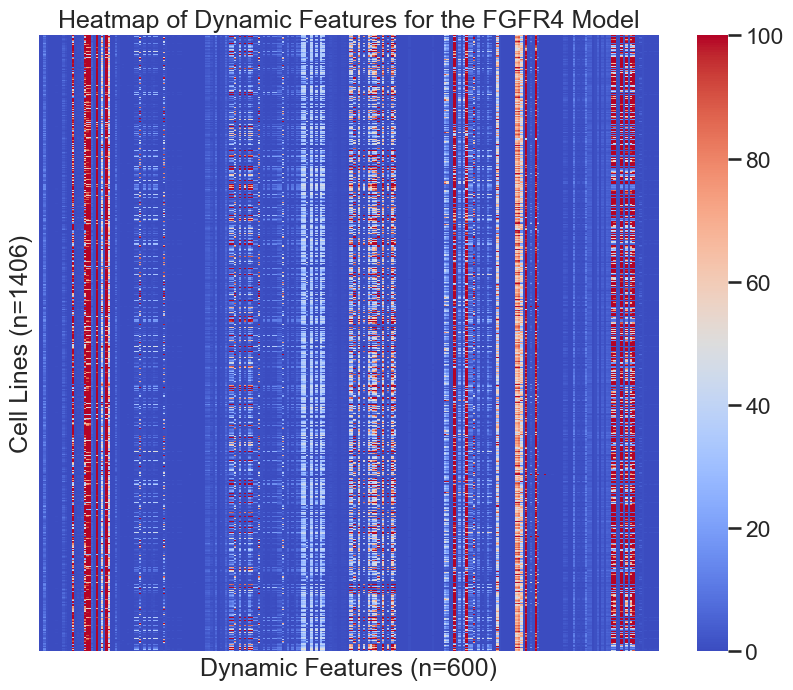

In [7]:
# visualise dynamic features as a heatmap

# all_proteins = [
#     'pAkt', 'pIGFR', 'pFGFR4', 'pERBB', 'pIRS', 'aPI3K', 'PIP3', 'pFRS2',
#     'aGrb2', 'aPDK1', 'amTORC1', 'pS6K', 'aSos', 'aShp2', 'aRas', 'aRaf',
#     'pMEK', 'pERK', 'aGAB1', 'aGAB2', 'SPRY2', 'pSPRY2', 'PTP', 'aCbl',
#     'FOXO', 'amTORC2'
# ] 


# import matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns


# set context and style

sns.set_style("whitegrid")

sns.set_context("talk")


# ValueError: could not convert string to float: 'ACH-001113'

# preprocess dynamic features further 


plt.figure(figsize=(10, 8))


dynamic_features_rowless = dynamic_features.drop(columns=['Unnamed: 0'])

# generate heatmap, with no xticks and yticks, but ylabels and xlabels apply
s = sns.heatmap(dynamic_features_rowless, 
            xticklabels=False, yticklabels=False,
            cmap='coolwarm', vmax=100, vmin=0)
s.set(xlabel='Dynamic Features (n=600)', 
      ylabel='Cell Lines (n=1406)', 
      title='Heatmap of Dynamic Features for the FGFR4 Model')

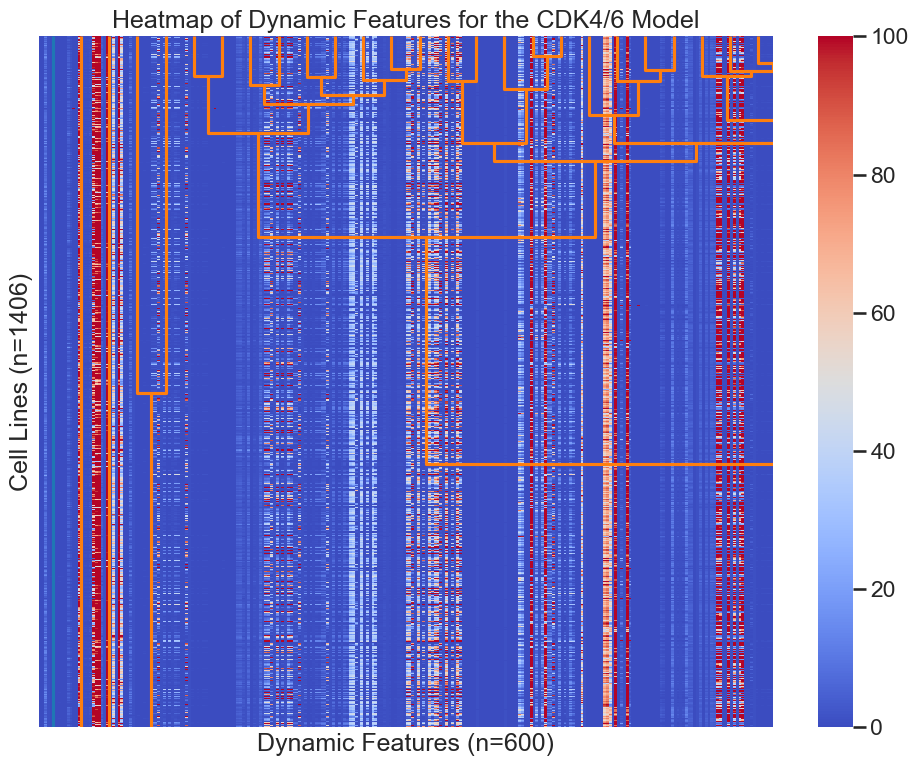

In [8]:
# perform hierarchical clustering on the dynamic features
from scipy.cluster import hierarchy

# generate linkage matrix
Z = hierarchy.linkage(dynamic_features_rowless, 'ward')

# plot dendrogram
plt.figure(figsize=(10, 8))
dn = hierarchy.dendrogram(Z, labels=dynamic_features['Unnamed: 0'].tolist())
plt.title('Dendrogram of Dynamic Features for the CDK4/6 Model')
plt.xlabel('Cell Lines')
plt.ylabel('Distance')

# plot the heatmap with the dendrogram
s = sns.heatmap(dynamic_features_rowless, 
            xticklabels=False, yticklabels=False,
            cmap='coolwarm', vmax=100, vmin=0)
s.set(xlabel='Dynamic Features (n=600)',
        ylabel='Cell Lines (n=1406)',
        title='Heatmap of Dynamic Features for the CDK4/6 Model')
plt.tight_layout()
plt.show()